In [30]:
# Podajemy dane - budujemy model HMM w social mediach

# Stany to: aktywny / nieaktywny
# Obserwacje to: scrollujący / reagujący / komentujący

observations = ("scrolls", "reacts", "comments")
states = ("Active", "Inactive")
start_p = {"Active": 0.5, "Inactive": 0.5}
trans_p = {
    "Active": {"Active": 0.7, "Inactive": 0.3},
    "Inactive": {"Active": 0.4, "Inactive": 0.6},
}
emit_p = {
    "Active": {"scrolls": 0.2, "reacts": 0.3, "comments": 0.5},
    "Inactive": {"scrolls": 0.7, "reacts": 0.2, "comments": 0.1},
}

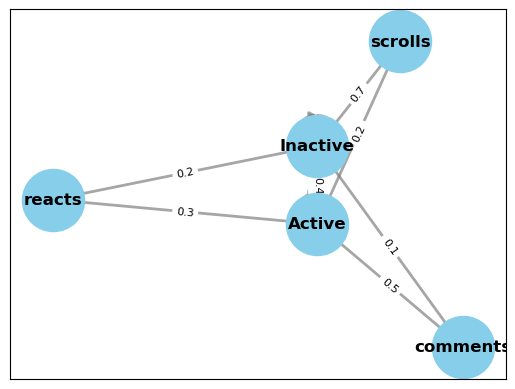

In [51]:
# Wykres/graf HMM

import networkx as nx
import matplotlib.pyplot as plt

def draw_hmm(observations, states, start_p, trans_p, emit_p):
    G = nx.DiGraph()

    # Dodaj węzły
    for state in states:
        G.add_node(state)

    # Dodaj krawędzie z wagami
    for from_state in states:
        for to_state, trans_prob in trans_p[from_state].items():
            G.add_edge(from_state, to_state, weight=trans_prob)

    # Dodaj wagi dla emisji
    for state in states:
        for observation, emit_prob in emit_p[state].items():
            G.add_edge(state, observation, weight=emit_prob)

    # Ustaw pozycje węzłów
    pos = nx.spring_layout(G)

    # Rysuj węzły
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="skyblue")

    # Rysuj krawędzie
    nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.7, edge_color="gray")

    # Rysuj etykiety
    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black", font_weight="bold")

    # Rysuj etykiety krawędzi
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Ustaw kolor tła
    plt.rcParams["axes.facecolor"] = "lightgray"

    # Wyświetl wykres
    plt.show()

# Wywołanie funkcji do rysowania HMM
draw_hmm(observations, states, start_p, trans_p, emit_p)


In [52]:
# Algorytm Viterbiego (wikipedia)

def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0] [st] = {"prob": start_p[st] * emit_p[st] [obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t - 1] [states[0]] ["prob"] * trans_p[states[0]] [st] * emit_p[st] [obs[t]]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t - 1] [prev_st] ["prob"] * trans_p[prev_st] [st] * emit_p[st] [obs[t]]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st

            max_prob = max_tr_prob
            V[t] [st] = {"prob": max_prob, "prev": prev_st_selected}

    for line in dptable(V):
        print(line)

    opt = []
    max_prob = 0.0
    best_st = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st

    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1] [previous] ["prev"])
        previous = V[t + 1] [previous] ["prev"]

    print ("The steps of states are " + " ".join(opt) + " with highest probability of %s" % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " " * 5 + "     ".join(("%3d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%lf" % v[state] ["prob"]) for v in V)

In [53]:
viterbi(observations,
        states,
        start_p,
        trans_p,
        emit_p)

       0       1       2
Active: 0.10000 0.04200 0.01470
Inactiv: 0.35000 0.04200 0.00252
The steps of states are Inactive Active Active with highest probability of 0.014699999999999998


# Interpretacja wyników

# Tabela prawdopodobienstw V
       0       1       2
Active: 0.10000 0.04200 0.01470
Inactive: 0.35000 0.04200 0.00252

W chwili 0, prawdopodobieństwo, że użytkownik jest "Active" po obserwacji "scrolls" wynosi 0.1, a dla "Inactive" wynosi 0.35.
W chwili 1, prawdopodobieństwa zostają zaktualizowane na podstawie obserwacji "reacts". Na przykład, prawdopodobieństwo, że użytkownik pozostaje "Active" po obserwacji "reacts" wynosi 0.042.
Proces ten kontynuuje się dla obserwacji "comments".

# Najbardziej prawdopodobna sciezka (opt)

Ostateczna sekwencja stanów (aktywny/nieaktywny) dla ciągu obserwacji "scrolls", "reacts", "comments" to "Inactive" -> "Active" -> "Active" z najwyższym prawdopodobieństwem 0.0147.

# Wniosek:

Analiza ta pozwala określić, jakie są najbardziej prawdopodobne stany (aktywny/nieaktywny) użytkowników w mediach społecznościowych w kontekście danego ciągu obserwacji (scrolls, reacts, comments). W tym konkretnym przypadku, najbardziej prawdopodobne jest, że użytkownik zaczyna jako "Inactive", staje się "Active" po obserwacji "scrolls", a następnie pozostaje "Active" po obserwacji "reacts" i "comments".